# Automatidata - Case Study


## Background
Automatidata works with its clients to transform their unused and stored data into useful solutions, such as performance dashboards, customer-facing tools, strategic business insights, and more. They specialize in identifying a client’s business needs and utilizing their data to meet those business needs. 

Automatidata is consulting for the New York City Taxi and Limousine Commission (TLC). New York City TLC is an agency responsible for licensing and regulating New York City's taxi cabs and for-hire vehicles. The agency has partnered with Automatidata to develop a regression model that predicts taxi and limousine ride durations based on location and time of day data that TLC has gathered. 

The TLC data comes from over 200,000 taxi and limousine licensees, making approximately one million combined trips per day. 

## Problem Statement
You are a data professional in a data analytics firm called Automatidata. Their client, the New York City Taxi & Limousine Commission (New York City TLC), has requested that you build a machine learning model to predict if a customer will not leave a tip. They want to use the model in an app that will alert taxi drivers to customers who are unlikely to tip, since drivers depend on tips, and the ability to filter out people who don't tip would help increase driver revenue.

## Modelling Purpose and Goal
The purpose of this model is to find ways to generate more revenue for taxi cab drivers. The goal of this model is to predict whether or not a customer is a generous tipper.

In [79]:
# Import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import datetime as dt
import seaborn as sns

from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.metrics import roc_auc_score, roc_curve
from sklearn.metrics import accuracy_score, precision_score, recall_score,\
f1_score, confusion_matrix, ConfusionMatrixDisplay, RocCurveDisplay

from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier

# This is the function that helps plot feature importance 
from xgboost import plot_importance

# This module lets us save our models once we fit them.
import pickle

In [80]:
# Read the dataset
df0 = pd.read_csv('2017_Yellow_Taxi_Trip_Data.csv')
df0

,Unnamed: 0,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount
0,24870114,2,03/25/2017 8:55:43 AM,03/25/2017 9:09:47 AM,6,3.34,1,N,100,231,1,13.0,0.0,0.5,2.76,0.00,0.3,16.56
1,35634249,1,04/11/2017 2:53:28 PM,04/11/2017 3:19:58 PM,1,1.80,1,N,186,43,1,16.0,0.0,0.5,4.00,0.00,0.3,20.80
2,106203690,1,12/15/2017 7:26:56 AM,12/15/2017 7:34:08 AM,1,1.00,1,N,262,236,1,6.5,0.0,0.5,1.45,0.00,0.3,8.75
3,38942136,2,05/07/2017 1:17:59 PM,05/07/2017 1:48:14 PM,1,3.70,1,N,188,97,1,20.5,0.0,0.5,6.39,0.00,0.3,27.69
4,30841670,2,04/15/2017 11:32:20 PM,04/15/2017 11:49:03 PM,1,4.37,1,N,4,112,2,16.5,0.5,0.5,0.00,0.00,0.3,17.80
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22694,14873857,2,02/24/2017 5:37:23 PM,02/24/2017 5:40:39 PM,3,0.61,1,N,48,186,2,4.0,1.0,0.5,0.00,0.00,0.3,5.80
22695,66632549,2,08/06/2017 4:43:59 PM,08/06/2017 5:24:47 PM,1,16.71,2,N,132,164,1,52.0,0.0,0.5,14.64,5.76,0.3,73.20
22696,74239933,2,09/04/2017 2:54:14 PM,09/04/2017 2:58:22 PM,1,0.42,1,N,107,234,2,4.5,0.0,0.5,0.00,0.00,0.3,5.30
22697,60217333,2,07/15/2017 12:56:30 PM,07/15/2017 1:08:26 PM,1,2.36,1,N,68,144,1,10.5,0.0,0.5,1.70,0.00,0.3,13.00


## EDA

In [81]:
df0.head()

,Unnamed: 0,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount
0,24870114,2,03/25/2017 8:55:43 AM,03/25/2017 9:09:47 AM,6,3.34,1,N,100,231,1,13.0,0.0,0.5,2.76,0.0,0.3,16.56
1,35634249,1,04/11/2017 2:53:28 PM,04/11/2017 3:19:58 PM,1,1.80,1,N,186,43,1,16.0,0.0,0.5,4.00,0.0,0.3,20.80
2,106203690,1,12/15/2017 7:26:56 AM,12/15/2017 7:34:08 AM,1,1.00,1,N,262,236,1,6.5,0.0,0.5,1.45,0.0,0.3,8.75
3,38942136,2,05/07/2017 1:17:59 PM,05/07/2017 1:48:14 PM,1,3.70,1,N,188,97,1,20.5,0.0,0.5,6.39,0.0,0.3,27.69
4,30841670,2,04/15/2017 11:32:20 PM,04/15/2017 11:49:03 PM,1,4.37,1,N,4,112,2,16.5,0.5,0.5,0.00,0.0,0.3,17.80


In [82]:
df0.size

408582

In [83]:
df0.describe()

,Unnamed: 0,VendorID,passenger_count,trip_distance,RatecodeID,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount
count,2.269900e+04,22699.000000,22699.000000,22699.000000,22699.000000,22699.000000,22699.000000,22699.000000,22699.000000,22699.000000,22699.000000,22699.000000,22699.000000,22699.000000,22699.000000
mean,5.675849e+07,1.556236,1.642319,2.913313,1.043394,162.412353,161.527997,1.336887,13.026629,0.333275,0.497445,1.835781,0.312542,0.299551,16.310502
std,3.274493e+07,0.496838,1.285231,3.653171,0.708391,66.633373,70.139691,0.496211,13.243791,0.463097,0.039465,2.800626,1.399212,0.015673,16.097295
min,1.212700e+04,1.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,-120.000000,-1.000000,-0.500000,0.000000,0.000000,-0.300000,-120.300000
25%,2.852056e+07,1.000000,1.000000,0.990000,1.000000,114.000000,112.000000,1.000000,6.500000,0.000000,0.500000,0.000000,0.000000,0.300000,8.750000
50%,5.673150e+07,2.000000,1.000000,1.610000,1.000000,162.000000,162.000000,1.000000,9.500000,0.000000,0.500000,1.350000,0.000000,0.300000,11.800000
75%,8.537452e+07,2.000000,2.000000,3.060000,1.000000,233.000000,233.000000,2.000000,14.500000,0.500000,0.500000,2.450000,0.000000,0.300000,17.800000
max,1.134863e+08,2.000000,6.000000,33.960000,99.000000,265.000000,265.000000,4.000000,999.990000,4.500000,0.500000,200.000000,19.100000,0.300000,1200.290000


In [84]:
df0.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22699 entries, 0 to 22698
Data columns (total 18 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Unnamed: 0             22699 non-null  int64  
 1   VendorID               22699 non-null  int64  
 2   tpep_pickup_datetime   22699 non-null  object 
 3   tpep_dropoff_datetime  22699 non-null  object 
 4   passenger_count        22699 non-null  int64  
 5   trip_distance          22699 non-null  float64
 6   RatecodeID             22699 non-null  int64  
 7   store_and_fwd_flag     22699 non-null  object 
 8   PULocationID           22699 non-null  int64  
 9   DOLocationID           22699 non-null  int64  
 10  payment_type           22699 non-null  int64  
 11  fare_amount            22699 non-null  float64
 12  extra                  22699 non-null  float64
 13  mta_tax                22699 non-null  float64
 14  tip_amount             22699 non-null  float64
 15  to

In [85]:
# Drop the Unnamed: 0 column
df0.drop('Unnamed: 0', axis=1, inplace=True)

# Convert the pickup and dropoff datetime columns to datetime objects
df0['tpep_pickup_datetime'] = pd.to_datetime(df0['tpep_pickup_datetime'])
df0['tpep_dropoff_datetime'] = pd.to_datetime(df0['tpep_dropoff_datetime'])

df0.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22699 entries, 0 to 22698
Data columns (total 17 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   VendorID               22699 non-null  int64         
 1   tpep_pickup_datetime   22699 non-null  datetime64[ns]
 2   tpep_dropoff_datetime  22699 non-null  datetime64[ns]
 3   passenger_count        22699 non-null  int64         
 4   trip_distance          22699 non-null  float64       
 5   RatecodeID             22699 non-null  int64         
 6   store_and_fwd_flag     22699 non-null  object        
 7   PULocationID           22699 non-null  int64         
 8   DOLocationID           22699 non-null  int64         
 9   payment_type           22699 non-null  int64         
 10  fare_amount            22699 non-null  float64       
 11  extra                  22699 non-null  float64       
 12  mta_tax                22699 non-null  float64       
 13  t

In [86]:
df0.head()

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount
0,2,2017-03-25 08:55:43,2017-03-25 09:09:47,6,3.34,1,N,100,231,1,13.0,0.0,0.5,2.76,0.0,0.3,16.56
1,1,2017-04-11 14:53:28,2017-04-11 15:19:58,1,1.80,1,N,186,43,1,16.0,0.0,0.5,4.00,0.0,0.3,20.80
2,1,2017-12-15 07:26:56,2017-12-15 07:34:08,1,1.00,1,N,262,236,1,6.5,0.0,0.5,1.45,0.0,0.3,8.75
3,2,2017-05-07 13:17:59,2017-05-07 13:48:14,1,3.70,1,N,188,97,1,20.5,0.0,0.5,6.39,0.0,0.3,27.69
4,2,2017-04-15 23:32:20,2017-04-15 23:49:03,1,4.37,1,N,4,112,2,16.5,0.5,0.5,0.00,0.0,0.3,17.80


In [87]:
# Calculate duration of the trip 
df0['duration'] = (df0['tpep_dropoff_datetime']-df0['tpep_pickup_datetime'])

# Convert 'duration' col to seconds
df0['duration'] = df0['duration'].dt.total_seconds()

df0.head(10)

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,duration
0,2,2017-03-25 08:55:43,2017-03-25 09:09:47,6,3.34,1,N,100,231,1,13.0,0.0,0.5,2.76,0.0,0.3,16.56,844.0
1,1,2017-04-11 14:53:28,2017-04-11 15:19:58,1,1.80,1,N,186,43,1,16.0,0.0,0.5,4.00,0.0,0.3,20.80,1590.0
2,1,2017-12-15 07:26:56,2017-12-15 07:34:08,1,1.00,1,N,262,236,1,6.5,0.0,0.5,1.45,0.0,0.3,8.75,432.0
3,2,2017-05-07 13:17:59,2017-05-07 13:48:14,1,3.70,1,N,188,97,1,20.5,0.0,0.5,6.39,0.0,0.3,27.69,1815.0
4,2,2017-04-15 23:32:20,2017-04-15 23:49:03,1,4.37,1,N,4,112,2,16.5,0.5,0.5,0.00,0.0,0.3,17.80,1003.0
5,2,2017-03-25 20:34:11,2017-03-25 20:42:11,6,2.30,1,N,161,236,1,9.0,0.5,0.5,2.06,0.0,0.3,12.36,480.0
6,2,2017-05-03 19:04:09,2017-05-03 20:03:47,1,12.83,1,N,79,241,1,47.5,1.0,0.5,9.86,0.0,0.3,59.16,3578.0
7,2,2017-08-15 17:41:06,2017-08-15 18:03:05,1,2.98,1,N,237,114,1,16.0,1.0,0.5,1.78,0.0,0.3,19.58,1319.0
8,2,2017-02-04 16:17:07,2017-02-04 16:29:14,1,1.20,1,N,234,249,2,9.0,0.0,0.5,0.00,0.0,0.3,9.80,727.0
9,1,2017-11-10 15:20:29,2017-11-10 15:40:55,1,1.60,1,N,239,237,1,13.0,0.0,0.5,2.75,0.0,0.3,16.55,1226.0


Check for outliers using visualizations

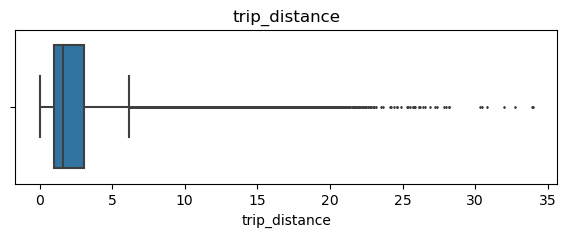

In [88]:
plt.figure(figsize=(7,2))
plt.title('trip_distance')
sns.boxplot(data=None, x=df0['trip_distance'], fliersize=1);

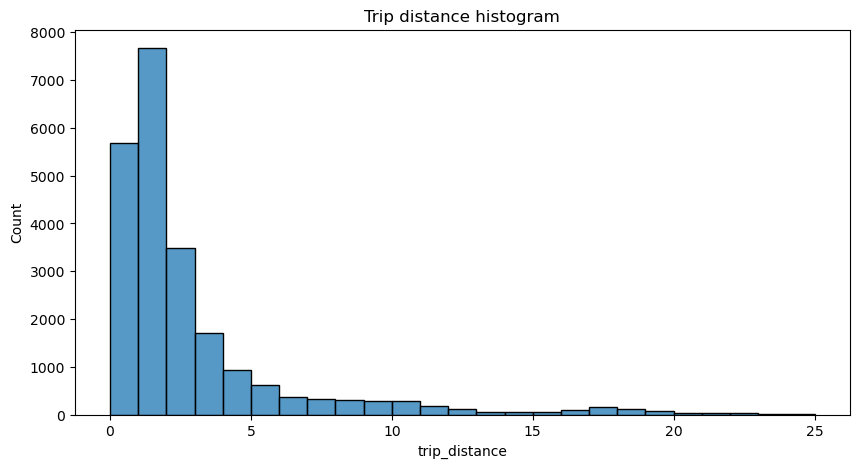

In [89]:
plt.figure(figsize=(10,5))
sns.histplot(df0['trip_distance'], bins=range(0,26,1))
plt.title('Trip distance histogram');

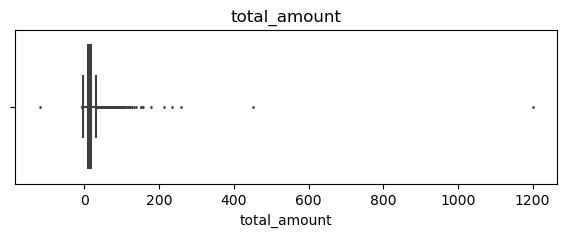

In [90]:
plt.figure(figsize=(7,2))
plt.title('total_amount')
sns.boxplot(x=df0['total_amount'], fliersize=1);

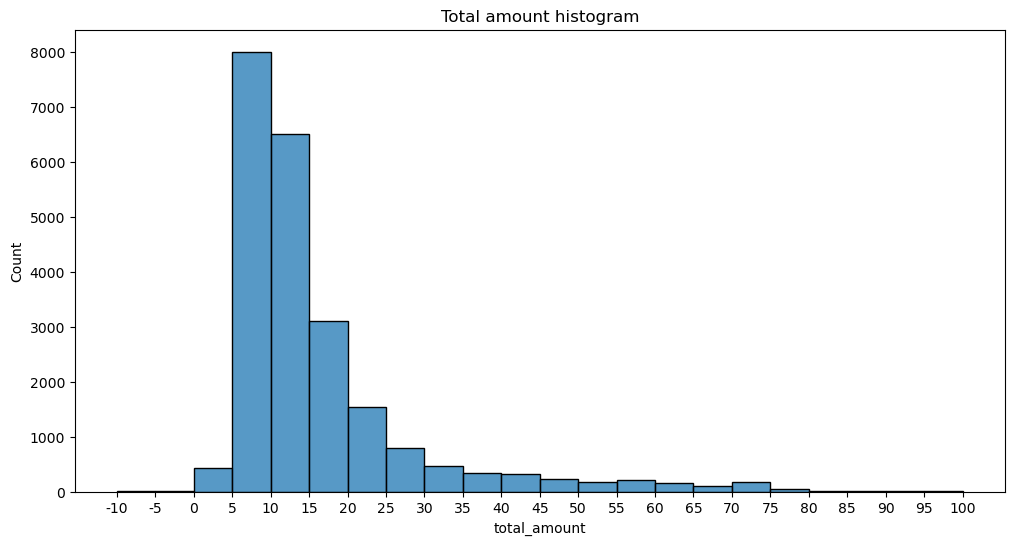

In [91]:
plt.figure(figsize=(12,6))
ax = sns.histplot(df0['total_amount'], bins=range(-10,101,5))
ax.set_xticks(range(-10,101,5))
ax.set_xticklabels(range(-10,101,5))
plt.title('Total amount histogram');

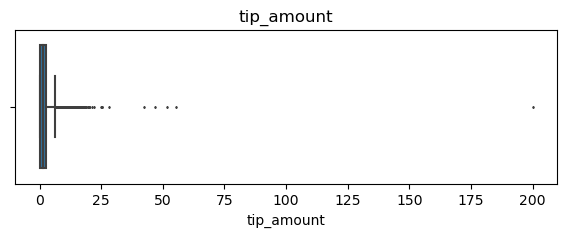

In [92]:
plt.figure(figsize=(7,2))
plt.title('tip_amount')
sns.boxplot(x=df0['tip_amount'], fliersize=1);

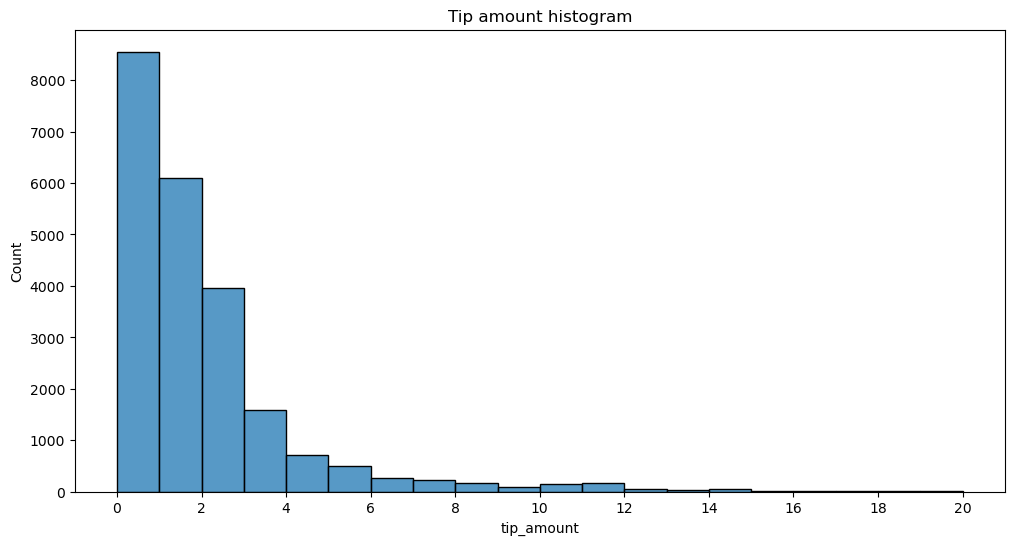

In [93]:
plt.figure(figsize=(12,6))
ax = sns.histplot(df0['tip_amount'], bins=range(0,21,1))
ax.set_xticks(range(0,21,2))
ax.set_xticklabels(range(0,21,2))
plt.title('Tip amount histogram');

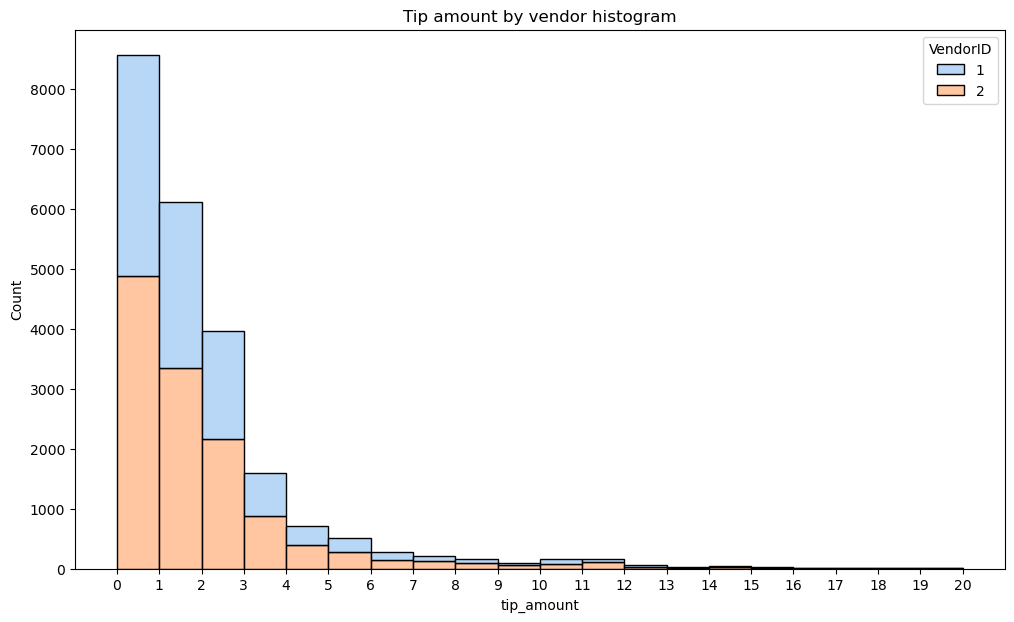

In [94]:
plt.figure(figsize=(12,7))
ax = sns.histplot(data=df0, x='tip_amount', bins=range(0,21,1), 
                  hue='VendorID', 
                  multiple='stack',
                  palette='pastel')
ax.set_xticks(range(0,21,1))
ax.set_xticklabels(range(0,21,1))
plt.title('Tip amount by vendor histogram');

Tip amounts were higher for Vendor 1

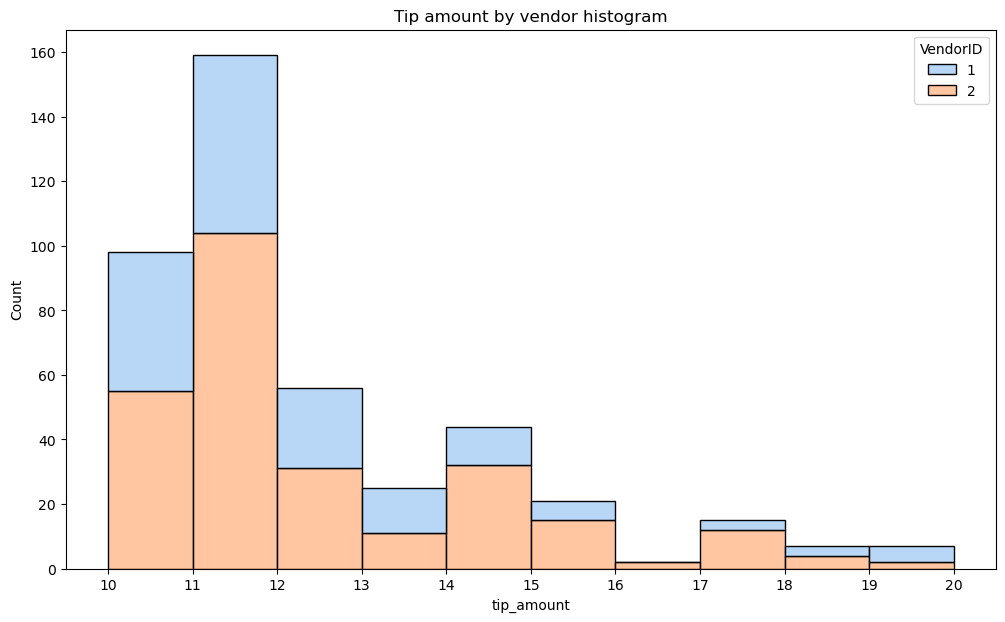

In [95]:
tips_over_ten = df0[df0['tip_amount'] > 10]
plt.figure(figsize=(12,7))
ax = sns.histplot(data=tips_over_ten, x='tip_amount', bins=range(10,21,1), 
                  hue='VendorID', 
                  multiple='stack',
                  palette='pastel')
ax.set_xticks(range(10,21,1))
ax.set_xticklabels(range(10,21,1))
plt.title('Tip amount by vendor histogram');

Tips greater than 10 were mostly for Vendor 1 as well

In [96]:
#Remove those trips with costs associated, but with trip distance = 0.
df1 = df0['trip_distance'].loc[~(df0==0).all(axis=1)]

<AxesSubplot:xlabel='total_amount', ylabel='trip_distance'>

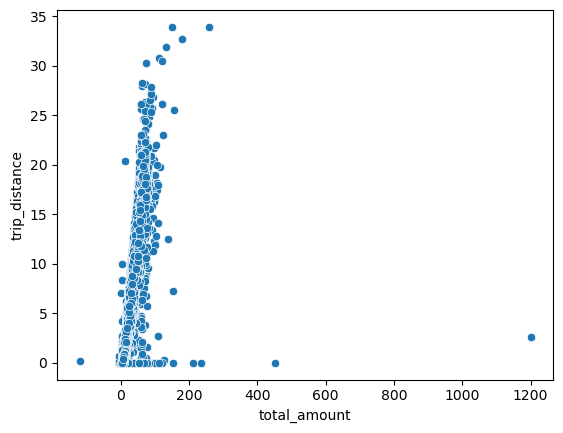

In [97]:
sns.scatterplot(x=df0['total_amount'], y=df1)

In [98]:
# How many of each payment type are represented in the data?
df0['payment_type'].value_counts()

1    15265
2     7267
3      121
4       46
Name: payment_type, dtype: int64

In [99]:
# What is the average tip for trips paid for with credit card?
avg_cc_tip = df0[df0['payment_type']==1]['tip_amount'].mean()
print('Avg. cc tip:', avg_cc_tip)

# What is the average tip for trips paid for with cash?
avg_cash_tip = df0[df0['payment_type']==2]['tip_amount'].mean()
print('Avg. cash tip:', avg_cash_tip)

Avg. cc tip: 2.7298001965279934
Avg. cash tip: 0.0


Customers who pay cash don't leave any tips! Therefore, we will focus on building our model around customers who pay using credit cards.

## Modelling

In [100]:
# Subset the data to isolate only customers who paid by credit card

# Copy df0 and assign to df1
df1 = df0.copy() 

# Filter df1 to contain only credit card customers
df1 = df1[df1['payment_type']==1]
df1

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,duration
0,2,2017-03-25 08:55:43,2017-03-25 09:09:47,6,3.34,1,N,100,231,1,13.0,0.0,0.5,2.76,0.00,0.3,16.56,844.0
1,1,2017-04-11 14:53:28,2017-04-11 15:19:58,1,1.80,1,N,186,43,1,16.0,0.0,0.5,4.00,0.00,0.3,20.80,1590.0
2,1,2017-12-15 07:26:56,2017-12-15 07:34:08,1,1.00,1,N,262,236,1,6.5,0.0,0.5,1.45,0.00,0.3,8.75,432.0
3,2,2017-05-07 13:17:59,2017-05-07 13:48:14,1,3.70,1,N,188,97,1,20.5,0.0,0.5,6.39,0.00,0.3,27.69,1815.0
5,2,2017-03-25 20:34:11,2017-03-25 20:42:11,6,2.30,1,N,161,236,1,9.0,0.5,0.5,2.06,0.00,0.3,12.36,480.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22692,1,2017-07-16 03:22:51,2017-07-16 03:40:52,1,5.70,1,N,249,17,1,19.0,0.5,0.5,4.05,0.00,0.3,24.35,1081.0
22693,2,2017-08-10 22:20:04,2017-08-10 22:29:31,1,0.89,1,N,229,170,1,7.5,0.5,0.5,1.76,0.00,0.3,10.56,567.0
22695,2,2017-08-06 16:43:59,2017-08-06 17:24:47,1,16.71,2,N,132,164,1,52.0,0.0,0.5,14.64,5.76,0.3,73.20,2448.0
22697,2,2017-07-15 12:56:30,2017-07-15 13:08:26,1,2.36,1,N,68,144,1,10.5,0.0,0.5,1.70,0.00,0.3,13.00,716.0


In [101]:
# Create tip% column
df1['tip_percent'] = df1['tip_amount']/(df1['total_amount']-df1['tip_amount'])
df1.head()

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,duration,tip_percent
0,2,2017-03-25 08:55:43,2017-03-25 09:09:47,6,3.34,1,N,100,231,1,13.0,0.0,0.5,2.76,0.0,0.3,16.56,844.0,0.200000
1,1,2017-04-11 14:53:28,2017-04-11 15:19:58,1,1.80,1,N,186,43,1,16.0,0.0,0.5,4.00,0.0,0.3,20.80,1590.0,0.238095
2,1,2017-12-15 07:26:56,2017-12-15 07:34:08,1,1.00,1,N,262,236,1,6.5,0.0,0.5,1.45,0.0,0.3,8.75,432.0,0.198630
3,2,2017-05-07 13:17:59,2017-05-07 13:48:14,1,3.70,1,N,188,97,1,20.5,0.0,0.5,6.39,0.0,0.3,27.69,1815.0,0.300000
5,2,2017-03-25 20:34:11,2017-03-25 20:42:11,6,2.30,1,N,161,236,1,9.0,0.5,0.5,2.06,0.0,0.3,12.36,480.0,0.200000


Now we will create another column called generous. This will be the target variable. The column should be a binary indicator of whether or not a customer tipped ≥ 20% (0=no, 1=yes).

In [102]:
# Create 'generous' col (target)
df1['generous'] = df1['tip_percent']
df1['generous'] = (df1['generous'] >= 0.2)
df1['generous'] = df1['generous'].astype(int)

In [103]:
# Drop unpredictive features like store_and_fwd_flag
df1.drop(['store_and_fwd_flag'], axis=1, inplace=True)

In [104]:
# Create a 'day' col
df1['day'] = df1['tpep_pickup_datetime'].dt.day_name().str.lower()

In [105]:
# Create 'am_rush' col
df1['am_rush'] = df1['tpep_pickup_datetime'].dt.hour

# Create 'daytime' col
df1['daytime'] = df1['tpep_pickup_datetime'].dt.hour

# Create 'pm_rush' col
df1['pm_rush'] = df1['tpep_pickup_datetime'].dt.hour

# Create 'nighttime' col
df1['nighttime'] = df1['tpep_pickup_datetime'].dt.hour

In [106]:
# Define 'am_rush()' conversion function [06:00–10:00)
def am_rush(hour):
    if 6 <= hour['am_rush'] < 10:
        val = 1
    else:
        val = 0
    return val

# Define 'daytime()' conversion function [10:00–16:00)
def daytime(hour):
    if 10 <= hour['daytime'] < 16:
        val = 1
    else:
        val = 0
    return val

# Define 'pm_rush()' conversion function [16:00–20:00)
def pm_rush(hour):
    if 16 <= hour['pm_rush'] < 20:
        val = 1
    else:
        val = 0
    return val

# Define 'nighttime()' conversion function [20:00–06:00)
def nighttime(hour):
    if 20 <= hour['nighttime'] < 24:
        val = 1
    else:
        val = 0
    return val

# Apply 'am_rush()' conversion function
df1['am_rush'] = df1.apply(am_rush, axis=1)

# Apply 'daytime()' conversion function
df1['daytime'] = df1.apply(daytime, axis=1)

# Apply 'pm_rush()' conversion function
df1['pm_rush'] = df1.apply(pm_rush, axis=1)

# Apply 'nighttime()' conversion function
df1['nighttime'] = df1.apply(nighttime, axis=1)


In [107]:
# Create 'month' col
df1['month'] = df1['tpep_pickup_datetime'].dt.month_name().str.lower()

In [108]:
df1.head()

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,PULocationID,DOLocationID,payment_type,fare_amount,...,total_amount,duration,tip_percent,generous,day,am_rush,daytime,pm_rush,nighttime,month
0,2,2017-03-25 08:55:43,2017-03-25 09:09:47,6,3.34,1,100,231,1,13.0,...,16.56,844.0,0.200000,1,saturday,1,0,0,0,march
1,1,2017-04-11 14:53:28,2017-04-11 15:19:58,1,1.80,1,186,43,1,16.0,...,20.80,1590.0,0.238095,1,tuesday,0,1,0,0,april
2,1,2017-12-15 07:26:56,2017-12-15 07:34:08,1,1.00,1,262,236,1,6.5,...,8.75,432.0,0.198630,0,friday,1,0,0,0,december
3,2,2017-05-07 13:17:59,2017-05-07 13:48:14,1,3.70,1,188,97,1,20.5,...,27.69,1815.0,0.300000,1,sunday,0,1,0,0,may
5,2,2017-03-25 20:34:11,2017-03-25 20:42:11,6,2.30,1,161,236,1,9.0,...,12.36,480.0,0.200000,1,saturday,0,0,0,1,march


In [109]:
# Drop 'tpep_pickup_datetime' and 'tpep_dropoff_datetime' col
df1.drop(['tpep_pickup_datetime', 'tpep_dropoff_datetime'], axis=1, inplace=True)

Many of the columns are categorical and will need to be dummied (converted to binary). Some of these columns are numeric, but they actually encode categorical information, such as RatecodeID and the pickup and dropoff locations. To make these columns recognizable to the get_dummies() function as categorical variables, we first need to convert them to type(str).

In [110]:
# Define list of cols to convert to string 
cols_to_str = ['RatecodeID','PULocationID',	'DOLocationID']

for col in cols_to_str:
    df1[col] = df1[col].astype(str)

In [111]:
# Subtract 1 from every value in 'VendorID' col
df1['VendorID'] = df1['VendorID'] - 1 

In [112]:
# Convert categoricals to binary
df2 = pd.get_dummies(df1)

Finally, drop the columns that are constant or that contain information that would be a proxy for our target variable. For example, total_amount contains tip amount, and therefore tip percentage, if used with fare_amount. And mta_tax is $0.50 99.6% of the time, so it's not adding any predictive signal to the model.

In [113]:
# Drop redundant and proxy columns
df3 = df2.drop(['payment_type', 'mta_tax', 'tip_amount', 'total_amount', 'tip_percent'],
               axis=1)

In [114]:
# Get class balance of 'generous' col
df3['generous'].value_counts()

0    9944
1    5321
Name: generous, dtype: int64

Approximately 1/3 of the customers in this dataset were "generous" (tipped ≥ 20%). The dataset is imbalanced, but not extremely so.

To determine a metric, consider the cost of both kinds of model error:

- False positives (the model predicts a tip ≥ 20%, but the customer does not give one)
- False negatives (the model predicts a tip < 20%, but the customer gives more)

False positives are worse for cab drivers, because they would pick up a customer expecting a good tip and then not receive one, angering the driver.

False negatives are worse for customers, because a cab driver would likely pick up a different customer who was predicted to tip more—even when the original customer would have tipped generously.

Since the client represents taxi drivers, we use a metric that evaluates false positives.

In [115]:
# Separate the target from the features
y = df3['generous']

# Separate the features from the target
X = df3.drop(['generous'], axis=1)

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [116]:
# Instantiate the model
rf = RandomForestClassifier(random_state=42)

# Create a dictionary cv_params with the parameters to be searched
cv_params = {'max_depth': [4,5,6], 
             'max_features': [1.0],
             'max_samples': [0.7, 1.0],
             'min_samples_leaf': [1,2],
             'min_samples_split': [2,3],
             'n_estimators': [300],
             } 

# Define a dictionary for scoring metrics to be used
scoring = {'accuracy', 'precision', 'recall', 'f1'}

# Instantiate GridSearchCV
rf_cv1= GridSearchCV(rf, cv_params, scoring=scoring, refit='precision', cv=4)

In [117]:
# Fit it to the training data
rf_cv1.fit(X_train, y_train)


GridSearchCV(cv=4, estimator=RandomForestClassifier(random_state=42),
             param_grid={'max_depth': [4, 5, 6], 'max_features': [1.0],
                         'max_samples': [0.7, 1.0], 'min_samples_leaf': [1, 2],
                         'min_samples_split': [2, 3], 'n_estimators': [300]},
             refit='precision',
             scoring={'recall', 'accuracy', 'f1', 'precision'})

In [118]:
# Print the optimal parameters and best score
print("Best Parameters:", rf_cv1.best_params_)
print("Best Score:", rf_cv1.best_score_)

Best Parameters: {'max_depth': 5, 'max_features': 1.0, 'max_samples': 1.0, 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 300}
Best Score: 0.6724845944654352


In [120]:
# Define a path to the folder where you want to save the model
path = 'C://Users/USER/Documents/Automidata Project'

In [121]:
def write_pickle(path, model_object, save_name:str):
    with open(path + save_name + '.pickle', 'wb') as to_write:
        pickle.dump(model_object, to_write)

In [122]:
#write_pickle(path, rf_cv1, 'taxi_rf_cv1')

In [123]:
def read_pickle(path, saved_model_name:str):
    with open(path + saved_model_name + '.pickle', 'rb') as to_read:
        model = pickle.load(to_read)

        return model

In [124]:
rf_cv1 = read_pickle(path, 'taxi_rf_cv1')

In [125]:
# Define make_results function

def make_results(model_name:str, model_object, metric:str):
    '''
    Arguments:
        model_name (string): what you want the model to be called in the output table
        model_object: a fit GridSearchCV object
        metric (string): precision, recall, f1, or accuracy
  
    Returns a pandas df with the F1, recall, precision, and accuracy scores
    for the model with the best mean 'metric' score across all validation folds.  
    '''

    # Create dictionary that maps input metric to actual metric name in GridSearchCV
    metric_dict = {'precision': 'mean_test_precision',
                 'recall': 'mean_test_recall',
                 'f1': 'mean_test_f1',
                 'accuracy': 'mean_test_accuracy',
                 }

    # Get all the results from the CV and put them in a df
    cv_results = pd.DataFrame(model_object.cv_results_)

    # Isolate the row of the df with the max(metric) score
    best_estimator_results = cv_results.iloc[cv_results[metric_dict[metric]].idxmax(), :]

    # Extract Accuracy, precision, recall, and f1 score from that row
    f1 = best_estimator_results.mean_test_f1
    recall = best_estimator_results.mean_test_recall
    precision = best_estimator_results.mean_test_precision
    accuracy = best_estimator_results.mean_test_accuracy
  
    # Create table of results
    table = pd.DataFrame()
    table = table.append({'Model': model_name,
                        'Precision': precision,
                        'Recall': recall,
                        'F1': f1,
                        'Accuracy': accuracy,
                        },
                        ignore_index=True
                       )
  
    return table

In [126]:
# Call 'make_results()' on the GridSearch object
results = make_results('random forest 1: precision', rf_cv1, 'precision')
results

C:\Users\USER\AppData\Local\Temp\ipykernel_1876\4104576945.py:35: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  table = table.append({'Model': model_name,


,Model,Precision,Recall,F1,Accuracy
0,random forest 1: precision,0.672485,0.268639,0.38338,0.697019


The precision seems satisfactory, but not great. The other scores are very bad.

A model with such low F1 and recall scores is not good enough. We will try retuning the model to select based on F1 score instead.

In [127]:
# Instantiate the random forest classifier
rf = RandomForestClassifier(random_state=0)

# Create a dictionary of hyperparameters to tune
cv_params = {'max_depth': [5, 6, 7], 
             'max_features': [1.0],
             'max_samples': [0.7],
             'min_samples_leaf': [1,2],
             'min_samples_split': [2,3],
             'n_estimators': [300],
             }  

# Define a dictionary of scoring metrics to capture
scoring = {'accuracy', 'precision', 'recall', 'f1'}

# Instantiate the GridSearchCV object
rf_cv2 = GridSearchCV(rf, cv_params, scoring=scoring, cv=4, refit='f1')

In [128]:
rf_cv2.fit(X_train, y_train)

GridSearchCV(cv=4, estimator=RandomForestClassifier(random_state=0),
             param_grid={'max_depth': [5, 6, 7], 'max_features': [1.0],
                         'max_samples': [0.7], 'min_samples_leaf': [1, 2],
                         'min_samples_split': [2, 3], 'n_estimators': [300]},
             refit='f1', scoring={'recall', 'accuracy', 'f1', 'precision'})

In [129]:
# Examine best score
rf_cv2.best_score_

# Examine best parameters
rf_cv2.best_params_

{'max_depth': 7,
 'max_features': 1.0,
 'max_samples': 0.7,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'n_estimators': 300}

In [130]:
# Call 'make_results()' on the GridSearch object
results = make_results('random forest: f1', rf_cv2, 'f1')
results

C:\Users\USER\AppData\Local\Temp\ipykernel_1876\4104576945.py:35: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  table = table.append({'Model': model_name,


,Model,Precision,Recall,F1,Accuracy
0,random forest: f1,0.672893,0.339469,0.451173,0.709794


There was a modest improvement in both F1 and recall scores, but these results still are not good enough to deploy the model.

In [131]:
# Get scores on test data
preds = rf_cv2.best_estimator_.predict(X_test)

In [132]:
def get_test_scores(model_name:str, preds, y_test_data):

    accuracy = round(accuracy_score(y_test_data, preds), 3)
    precision = round(precision_score(y_test_data, preds), 3)
    recall = round(recall_score(y_test_data, preds), 3)
    f1 = round(f1_score(y_test_data, preds), 3)

    table = pd.DataFrame({'model': [model_name],
                        'precision': [precision], 
                        'recall': [recall],
                        'f1': [f1],
                        'accuracy': [accuracy]
                        })
  
    return table

In [133]:
rf_cv2_test_scores= get_test_scores('random forest: f1', preds, y_test)
rf_cv2_test_scores

,model,precision,recall,f1,accuracy
0,random forest: f1,0.661,0.309,0.421,0.714


All scores slightly decreased except for Accuracy

In [134]:
# Instantiate the XGBClassifier
xgb = XGBClassifier(random_state=0, objective='binary:logistic')

# Create a dictionary cv_params with the parameters to be searched
cv_params = {'max_depth': [8,12],
                'learning_rate': [0.01, 0.1],
                'min_child_weight': [4,5],
                'n_estimators': [100,300]}

# Define a dictionary for scoring metrics to be used
scoring = {'accuracy', 'precision', 'recall', 'f1'}

# Instantiate GridSearchCV
xgb_cv1 = GridSearchCV(xgb, cv_params, scoring=scoring, refit='f1', cv=4)

In [135]:
%%time
# Fit it to the training data
xgb_cv1.fit(X_train, y_train)

Wall time: 6min 55s


GridSearchCV(cv=4,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     feature_types=None, gamma=None,
                                     gpu_id=None, grow_policy=None,
                                     importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None,...
                                     max_delta_step=None, max_depth=None,
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                   

In [136]:
#write_pickle(path, xgb_cv1, 'taxi_xgb_cv1')

In [137]:
xgb_cv1 = read_pickle(path, 'taxi_xgb_cv1')

In [138]:
# Examine best score
xgb_cv1.best_score_

0.5628738537420508

In [139]:
# Examine best parameters
xgb_cv1.best_params_

{'learning_rate': 0.01,
 'max_depth': 12,
 'min_child_weight': 4,
 'n_estimators': 100}

In [140]:
# Call 'make_results()' on the GridSearch object
results = make_results('XGBoost 1: f1', xgb_cv1, 'f1')
results

C:\Users\USER\AppData\Local\Temp\ipykernel_1876\4104576945.py:35: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  table = table.append({'Model': model_name,


,Model,Precision,Recall,F1,Accuracy
0,XGBoost 1: f1,0.669484,0.485788,0.562874,0.735015


In [141]:
# Get scores on test data
preds = xgb_cv1.best_estimator_.predict(X_test)
xgb_cv_test_scores = get_test_scores('XGBoost 1: f1', preds, y_test)
xgb_cv_test_scores

,model,precision,recall,f1,accuracy
0,XGBoost 1: f1,0.659,0.484,0.558,0.742


In [142]:
# Concatenate the results
results1 = pd.concat([rf_cv2_test_scores, xgb_cv_test_scores], axis=0)

In [143]:
results1

,model,precision,recall,f1,accuracy
0,random forest: f1,0.661,0.309,0.421,0.714
0,XGBoost 1: f1,0.659,0.484,0.558,0.742


Accuracy  increased by 3.92%

Precision decreased by 0.3%

Recall increased by 56.6%

F1 increased by 32.5%

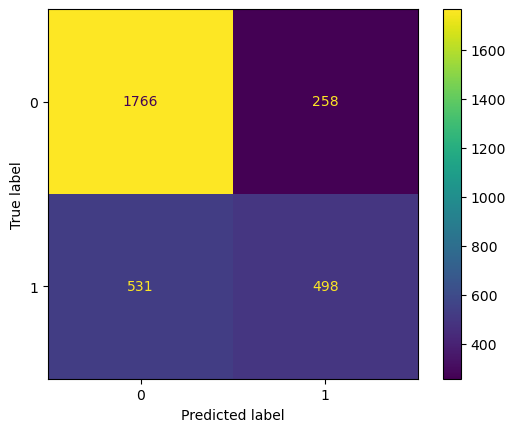

In [144]:
# Generate array of values for confusion matrix
cm = confusion_matrix(y_test, preds, labels=xgb_cv1.classes_)

# Plot confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                             display_labels=xgb_cv1.classes_)
disp.plot();

## Results
The model is twice as likely to predict a false negative than it is to predict a false positive. Therefore, type II errors are more common. For our use case, this is more desirable, because it's better for a driver to be pleasantly surprised by a generous tip when they weren't expecting one than to be disappointed by a low tip when they were expecting a generous one.

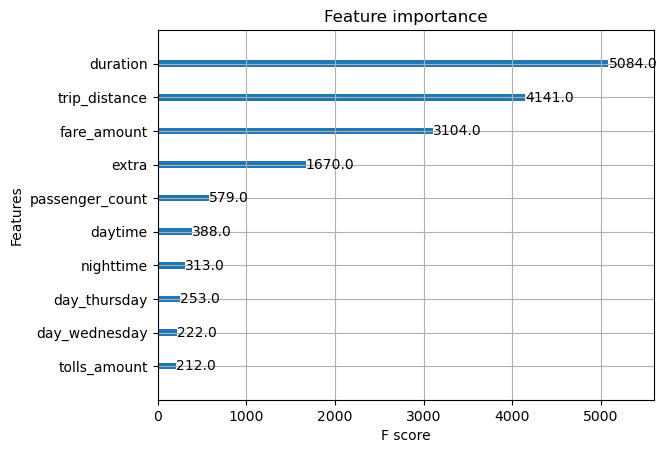

In [145]:
plot_importance(xgb_cv1.best_estimator_, max_num_features=10);